In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/datasets/UcClass"

Found 4640 images belonging to 3 classes.
Found 1163 images belonging to 3 classes.
51879936/51877672 [==============================] - 1s 0us/step
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
145/145 [==============================] - 2066s 14s/step - loss: 1.0036 - accuracy: 0.8974 - val_loss: 0.9752 - val_accuracy: 0.9601
Epoch 2/25
145/145 [==============================] - 1064s 7s/step - loss: 0.9606 - accuracy: 0.9756 - val_loss: 0.9518 - val_accuracy: 0.9714
Epoch 3/25
145/145 [==============================] - 1057s 7s/step - loss: 0.9383 - accuracy: 0.9806 - val_loss: 0.9293 - val_accuracy: 0.9757
Epoch 4/25
145/145 [==============================] - 1058s 7s/step - loss: 0.9170 - accuracy: 0.9830 - val_loss: 0.9084 - val_accuracy: 0.9835
Epoch 5/25
145/145 [==============================] - 1055s 7s/step - loss: 0.8959 - accuracy: 0.9866 - val_loss: 0.8892 - val_accuracy: 0.9783
Epoch 6/25
145/145 [==============================] - 

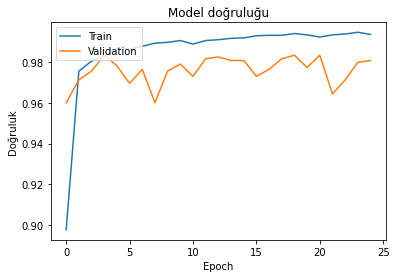

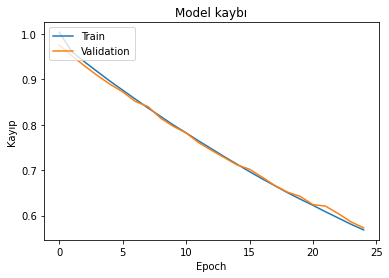

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
#import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras import Model, layers

train_dir = '/content/drive/My Drive/datasets/UcClass/train'
validation_dir = '/content/drive/My Drive/datasets/UcClass/val'

#train_dir = 'train'
#validation_dir = 'val'

train_datagen = ImageDataGenerator(
    #rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)
 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    class_mode='categorical',
    target_size=(224,224))
 
validation_datagen = ImageDataGenerator(
    #rescale=1./255)
    preprocessing_function=preprocess_input)
 
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=32,
    shuffle=False,
    class_mode='categorical',
    target_size=(224,224))

conv_base = DenseNet169(include_top=False,
                     weights='imagenet',
                     input_shape=(224, 224, 3))
for layer in conv_base.layers:
    layer.trainable = False
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='softmax')(x)
predictions = layers.Dense(3, activation='softmax')(x) #3 class sayımız
model = Model(conv_base.input, predictions)

optimizer = tf.keras.optimizers.RMSprop(lr=1e-4)
#optimizer = tf.keras.optimizers.Adam(lr=1e-4)
#optimizer = tf.keras.optimizers.Adamax(lr=1e-2, beta_1=0.9, beta_2=0.999)
#optimizer = tf.keras.optimizers.Adadelta(lr=1.0, rho=0.95)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

#model.summary()

history = model.fit_generator(
    generator=train_generator,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size, 
    validation_steps=validation_generator.n//validation_generator.batch_size,
    epochs=25)

model.save('/content/drive/My Drive/datasets/UcClass/modelDenseNet169RmpspropE25.h5')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model doğruluğu')
plt.ylabel('Doğruluk')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model kaybı')
plt.ylabel('Kayıp')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [0]:
!cat /proc/cpuinfo 

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [0]:
!lspci

/bin/bash: lspci: command not found
